In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CSE\ 519\ fall\ 2021/Project

/content/drive/MyDrive/CSE 519 fall 2021/Project


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
gc.enable()

In [ ]:
political = pd.read_csv('countypres_2000-2020.csv')
political.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes', 'version',
       'mode'],
      dtype='object')

In [ ]:
political = political.drop(political[(political['year'] != 2020)].index)

In [ ]:
political1 = political.groupby(["county_fips"])["candidatevotes" ].max().rename({'county_fips':'county_fips','max' : 'candidatevotes'})

In [ ]:
political1

county_fips
1001.0     19838.0
1003.0     83544.0
1005.0      5622.0
1007.0      7525.0
1009.0     24711.0
            ...   
56037.0    12229.0
56039.0     9848.0
56041.0     7496.0
56043.0     3245.0
56045.0     3107.0
Name: candidatevotes, Length: 3153, dtype: float64

In [ ]:
stateWise = pd.read_csv('StateWiseCovidData.csv')
stateWise['% of population fully vaccinated']=stateWise['% of population fully vaccinated'].str.replace('%','')
stateWise['% of population fully vaccinated']=(stateWise['% of population fully vaccinated'].str.replace('.','').astype(float))/100
stateWise['Total cases/ 1 M']=np.log10(stateWise['Total cases/ 1 M'].str.replace(',','').astype(float))*10
#stateWise['Total cases/ 1 M'] = stateWise['Total cases/ 1 M']
stateWise['Gini coefficient'] = 100 * stateWise['Gini coefficient']
stateWise['GDP']=stateWise['GDP'].str.replace('$','')
stateWise['GDP']=np.log10(stateWise['GDP'].str.replace(',','').astype(float))*10
stateWise['Very religious']=(stateWise['Very religious'].astype(str).str.replace('.','').astype(float))/10
stateWise['Moderately religious']=(stateWise['Moderately religious'].astype(str).str.replace('.','').astype(float))/10
stateWise['Non religious']=(stateWise['Non religious'].astype(str).str.replace('.','').astype(float))/10
stateWise.dropna()

,State,Location,% of population fully vaccinated,Total cases/ 1 M,Gini coefficient,GDP,Very religious,Moderately religious,Non religious
0,AL,Alabama,45.1,67.841519,48.47,46.855178,54.0,29.0,17.0
1,AK,Alaska,53.0,65.282227,40.81,48.409588,28.0,25.0,47.0
2,AZ,Arizona,53.5,67.867714,47.13,47.478311,31.0,31.0,38.0
3,AR,Arkansas,48.4,67.256533,47.19,46.778715,50.0,30.0,19.0
4,CA,California,61.8,80.169675,48.99,49.201912,29.0,30.0,41.0
5,CO,Colorado,62.0,70.896259,45.86,48.586094,30.0,27.0,43.0
6,CT,Connecticut,71.1,70.759962,49.45,49.122858,29.0,29.0,42.0
7,DE,Delaware,60.2,59.430699,45.22,49.035620,35.0,31.0,34.0
8,DC,District of Columbia,64.3,63.541509,54.20,53.415334,57.0,39.0,24.0
9,FL,Florida,60.1,76.258894,48.52,47.455744,35.0,32.0,33.0


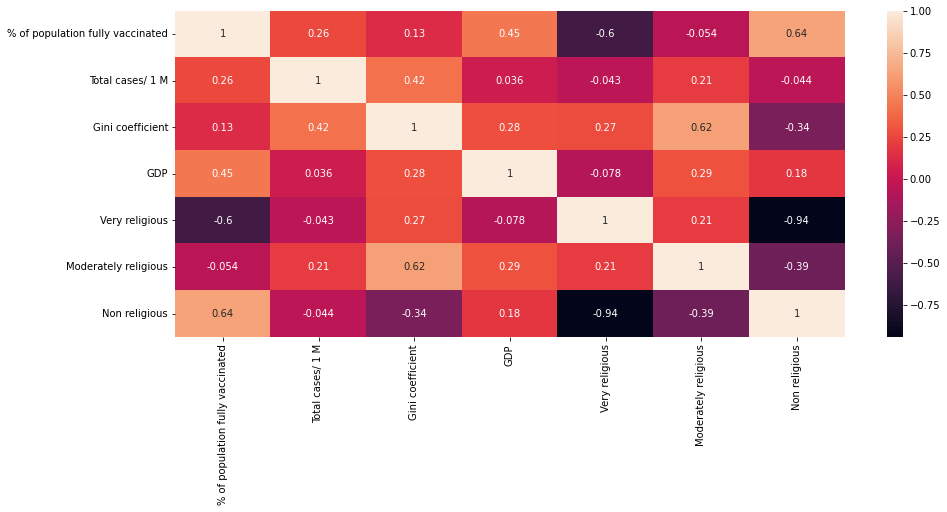

In [ ]:
#religious = stateWise[['Location','','Very religious','Moderately religious','Non religious']]
corr = stateWise.corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr, annot =True)
#ax = sns.heatmap(corr, cmap="YlGnBu")

In [ ]:
#stateWise = stateWise.sort_values(by=['Total cases/ 1 M'])
fig = plt.figure(figsize=(20, 6))
plt.xlabel("States", fontsize = 20)
plt.ylabel("Gini Index", fontsize = 20)
p1 = sns.lineplot(x=stateWise['State'], y=stateWise['Gini coefficient'], label='Gini index')
p3 = sns.lineplot(x=stateWise['State'], y=stateWise['Total cases/ 1 M'], label='total cases / 1 M')
sns.color_palette("mako", as_cmap=True)

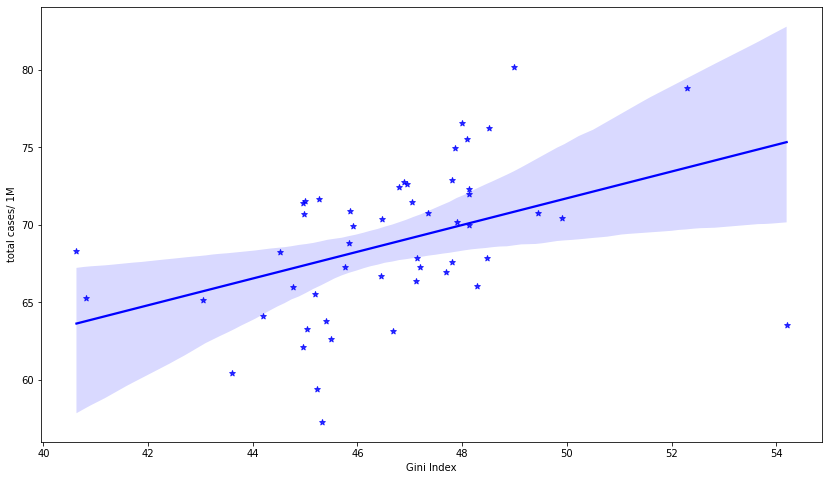

In [ ]:
fig = plt.figure(figsize=(14, 8))
x, y = pd.Series(stateWise['Gini coefficient'], name="Gini Index"), pd.Series(stateWise['Total cases/ 1 M'], name="total cases/ 1M")
ax = sns.regplot(x=x, y=y, marker="*", color="b")
ax.grid(False)


In [ ]:
stateWise = stateWise.sort_values(by=['% of population fully vaccinated'])
fig = plt.figure(figsize=(20, 10))
plt.xlabel("States", fontsize = 20)
plt.ylabel("% of population fully vaccinated", fontsize = 20)
p2 = sns.lineplot(x=stateWise['State'], y=stateWise['GDP'], label='GDP')
p4 = sns.lineplot(x=stateWise['State'], y=stateWise['% of population fully vaccinated'], label='fully vaccinated')

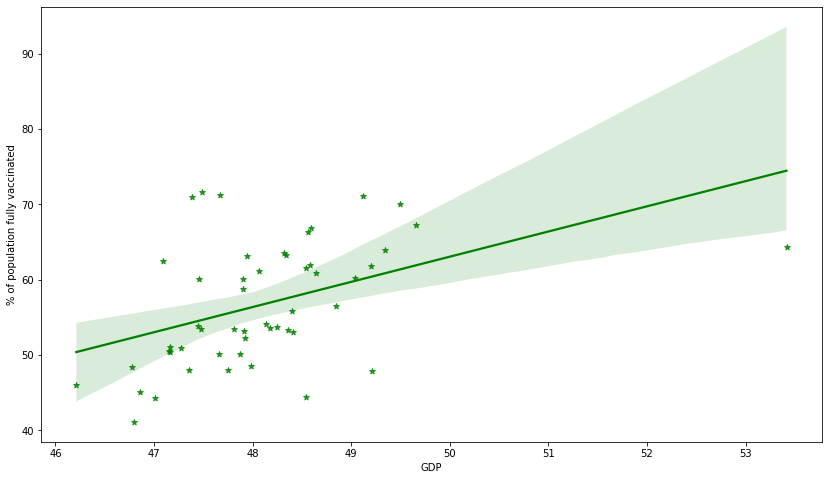

In [ ]:
#fig = plt.figure(figsize=(12, 6))
#plt.xlabel("GDP", fontsize = 20)
#plt.ylabel("% of population fully vaccinated", fontsize = 20)
#p2 = sns.lineplot(x=stateWise['State'], y=stateWise['GDP'], label='GDP')
#p4 = sns.scatterplot(x=stateWise['GDP'], y=stateWise['% of population fully vaccinated'], label='fully vaccinated')


fig = plt.figure(figsize=(14, 8))
x, y = pd.Series(stateWise['GDP'], name="GDP"), pd.Series(stateWise['% of population fully vaccinated'], name="% of population fully vaccinated")
ax = sns.regplot(x=x, y=y, marker="*", color="g")
plt.grid(False)


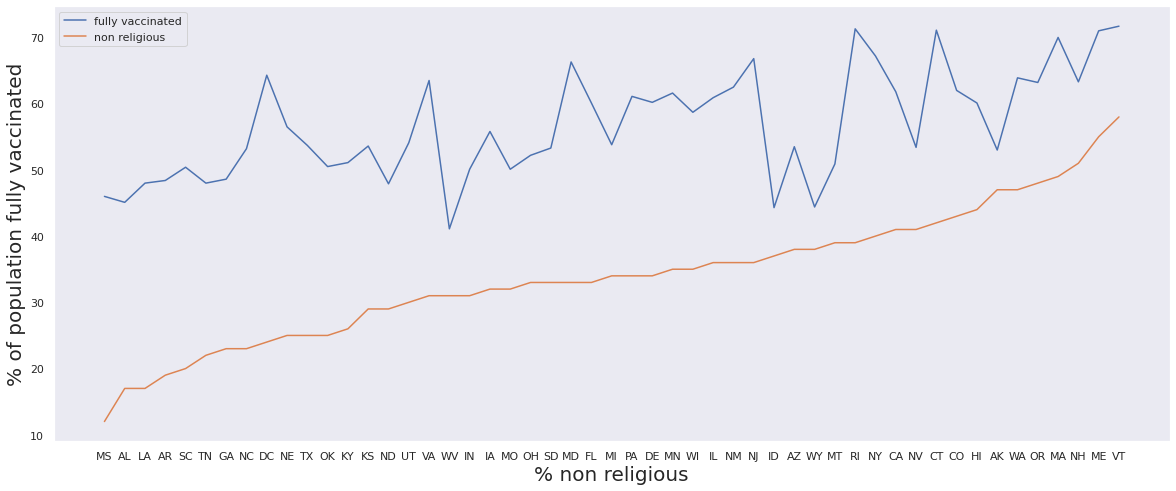

In [ ]:
#fig = plt.figure(figsize=(14, 8))
#x, y = pd.Series(stateWise['Non religious'], name="% non religious"), pd.Series(stateWise['% of population fully vaccinated'], name="% of population fully vaccinated")
#ax = sns.regplot(x=x, y=y, marker="*", color="c")

fig = plt.figure(figsize=(20, 8))
plt.xlabel("% non religious", fontsize = 20)
plt.ylabel("% of population fully vaccinated", fontsize = 20)
stateWise = stateWise.sort_values(by=['Non religious'])
plt.grid(False)

p2 = sns.lineplot(x=stateWise['State'], y=stateWise['% of population fully vaccinated'], label='fully vaccinated')
p3 = sns.lineplot(x=stateWise['State'], y=stateWise['Non religious'], label='non religious')
#p4 = sns.scatterplot(x=stateWise['Non religious'], y=stateWise['% of population fully vaccinated'], label='fully vaccinated')

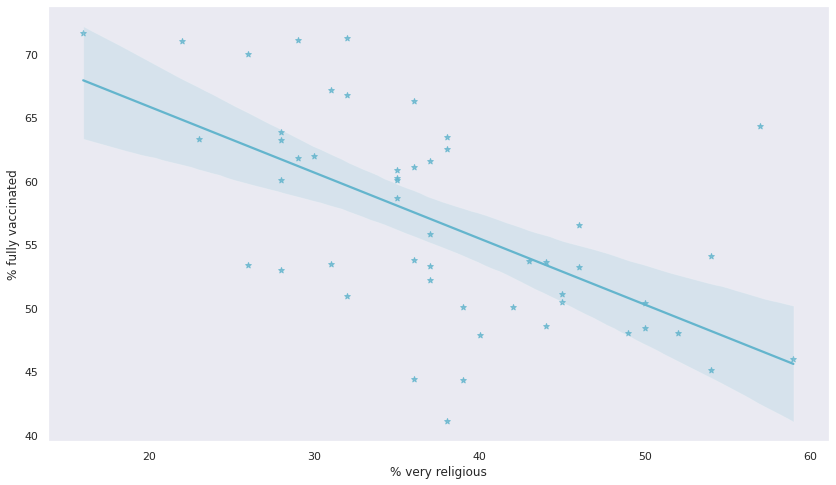

In [ ]:
#fig = plt.figure(figsize=(20, 10))
#plt.xlabel("States", fontsize = 20)
#plt.ylabel("% of population fully vaccinated", fontsize = 20)
#p2 = sns.lineplot(x=stateWise['State'], y=stateWise['% of population fully vaccinated'], label='fully vaccinated')
#p3 = sns.lineplot(x=stateWise['State'], y=stateWise['Very religious'], label='Very religious')

fig = plt.figure(figsize=(14, 8))
plt.grid(False)
x, y = pd.Series(stateWise['Very religious'], name="% very religious"), pd.Series(stateWise['% of population fully vaccinated'], name="% fully vaccinated")
ax = sns.regplot(x=x, y=y, marker="*", color="c")
